# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 05/02/2023
* Student Name: Brian Blancato
* Student Net ID: bab3fq
* This URL: https://github.com/BrianBlancato/DS5100_Final_Project/blob/main/montecarlo_demo.ipynb
* GitHub Repo URL: https://github.com/BrianBlancato/DS5100_Final_Project

# The Monte Carlo Module

In [1]:
# A code block with your classes.

# Test Module

In [2]:
# A code block with your test code.

# Test Results

In [3]:
import unittest
from montecarlosimulator import montecarlo_tests

loader = unittest.TestLoader()
suite = loader.loadTestsFromModule(montecarlo_tests)
unittest.TextTestRunner().run(suite)

........
----------------------------------------------------------------------
Ran 8 tests in 0.027s

OK


Welcome to the Monte Carlo Simulator


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

# Scenarios

 

## Scenario 1

In [4]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [5]:
fair_coin = montecarlosimulator.Die(["H", "T"])

sc1_game1 = montecarlosimulator.Game([fair_coin, fair_coin, fair_coin, fair_coin, fair_coin])
sc1_game1.play(1000)

sc1_analyzer1 = montecarlosimulator.Analyzer(sc1_game1)

sc1_freq_1 = sc1_analyzer1.jackpot() / 1000

sc1_freq_1

0.063

In [6]:
unfair_coin = montecarlosimulator.Die(["H", "T"])
unfair_coin.change_weight("H", 5.0)

sc1_game2 = montecarlosimulator.Game([unfair_coin, unfair_coin, fair_coin, fair_coin, fair_coin])
sc1_game2.play(1000)

sc1_analyzer2 = montecarlosimulator.Analyzer(sc1_game2)

sc1_freq_2 = sc1_analyzer2.jackpot() / 1000

sc1_freq_2

0.074

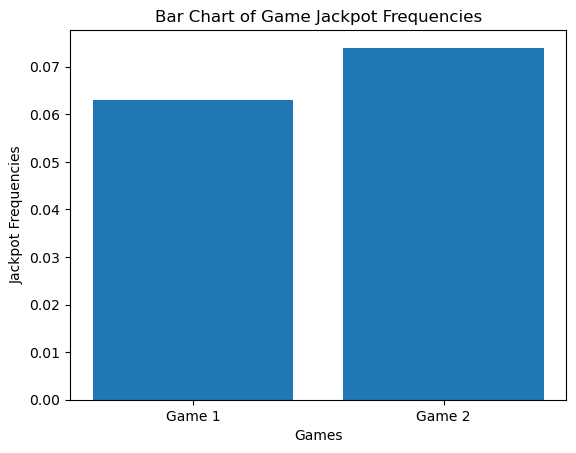

In [7]:
plt.bar(['Game 1', 'Game 2'], [sc1_freq_1, sc1_freq_2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 2

In [8]:
import montecarlosimulator
import matplotlib.pyplot as plt

In [9]:
fair_die = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

sc2_game1 = montecarlosimulator.Game([fair_die, fair_die, fair_die, fair_die, fair_die])
sc2_game1.play(10000)

sc2_analyzer1 = montecarlosimulator.Analyzer(sc2_game1)

sc2_freq1 = sc2_analyzer1.jackpot() / 10000

sc2_freq1

0.0006

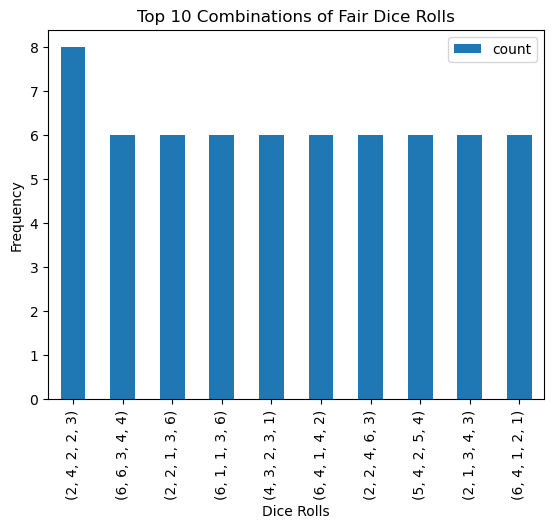

In [10]:
sc2_analyzer1.combo()
sc2_game1_top_combos = sc2_analyzer1.combos
sc2_game1_top_10 = sc2_game1_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game1_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Fair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

In [11]:
unfair_die_type1 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])
unfair_die_type2 = montecarlosimulator.Die([1, 2, 3, 4, 5, 6])

unfair_die_type1.change_weight(6, 5)
unfair_die_type2.change_weight(1, 5)

sc2_game2 = montecarlosimulator.Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
sc2_game2.play(10000)

sc2_analyzer2 = montecarlosimulator.Analyzer(sc2_game2)

sc2_freq2 = sc2_analyzer2.jackpot() / 10000

sc2_freq2

0.0013

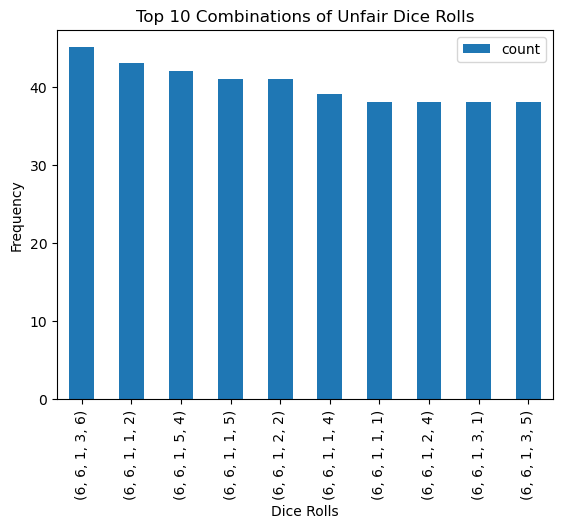

In [12]:
sc2_analyzer2.combo()
sc2_game2_top_combos = sc2_analyzer2.combos
sc2_game2_top_10 = sc2_game2_top_combos.sort_values(by='count', ascending=False,).head(10)

sc2_game2_top_10.plot(kind='bar', y='count')

plt.title("Top 10 Combinations of Unfair Dice Rolls")
plt.xlabel('Dice Rolls')
plt.ylabel('Frequency')

plt.show()

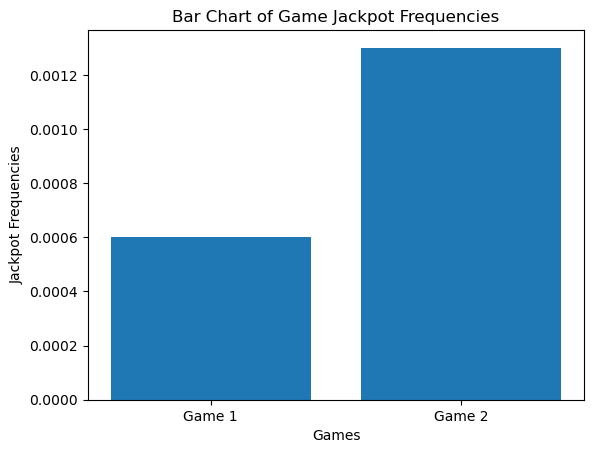

In [13]:
plt.bar(['Game 1', 'Game 2'], [sc2_freq1, sc2_freq2])
plt.title('Bar Chart of Game Jackpot Frequencies')
plt.xlabel('Games')
plt.ylabel('Jackpot Frequencies')
plt.show()

## Scenario 3

In [14]:
import pandas as pd
import montecarlosimulator

In [15]:
# create the letter column and frequency column as lists
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
frequencies = [8.4966, 2.072, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705, 3.0034,
               7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544, 7.1635, 3.1671,
               0.1962, 7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899, 0.2902,
               1.7779, 0.2722]

# create the DataFrame
letter_freq_df = pd.DataFrame({'letter': letters, 'frequency': frequencies})

In [19]:
letter_array = letter_freq_df['letter'].values
letter_die = montecarlosimulator.Die(letter_array)

for face in letter_array:
    frequency = letter_freq_df.loc[letter_freq_df['letter'] == face, 'frequency'].values[0]
    letter_die.change_weight(face, frequency)
    
sc3_game = montecarlosimulator.Game([letter_die, letter_die, letter_die, letter_die, letter_die])
sc3_game.play(1000)

sc3_analyzer = montecarlosimulator.Analyzer(sc3_game)

sc3_analyzer.combo()
sc3_combos = sc3_analyzer.combos

In [20]:
pd.set_option('display.max_rows', None)
sc3_combos

count
1 2 3 4 5       
A A A R N      1
    C E N      1
    I N O      1
    L E H      1
    N I H      1
    O O T      1
      S U      1
  B R U L      1
    S R E      1
  C A W I      1
    N A A      1
  D K T S      1
    N E U      1
  E A E E      1
    B A S      1
      D M      1
    D N R      1
    E W G      1
    F R M      1
    G H R      1
    I A P      1
    S A O      1
      O E      1
      T R      1
    W C O      1
      I N      1
  F D C D      1
  G T W I      1
  H H H V      1
    I A F      1
  I C S R      1
    E T R      1
    I A B      1
    L L L      1
    N M L      1
    P T I      1
    S V A      1
    T P I      1
    W Y O      1
  K U A C      1
  L C S T      1
    E E T      1
    G U U      1
    N A G      1
    O L A      1
    R A I      1
      E O      1
      O H      1
    S Y R      1
  M G G A      1
    O W E      1
    T A E      1
  N E L E      1
    G B R      1
    I C A      1
    N T Y      1
    R A A      1
    T T U      1
  O D R C      1
    E S V      1
    F R U      1
    L O Y      1
    N T L      1
  P E A B      1
    I P C      1
    N E I      1
    T W O      1
  R A I H      1
      W T      1
    F G A      1
    J E K      1
    N C I      1
    O E I      1
    R Q E      1
    U T A      1
    W H O      1
  S C R T      1
    I O E      1
    L N T      1
    O A G      1
      O R      1
    P E T      1
  T I D W      1
    V A A      1
  U E E G      1
      S Y      1
    H A U      1
    L D F      1
    R R D      1
  V N P O      1
  W E E E      1
    O I E      1
  Y E T H      1
    O L I      1
B C E D E      1
  D I H M      1
    M E R      1
  E N A A      1
    Y T A      1
  F E M E      1
    F T N      1
  H A Y K      1
    R E U      1
  I A V S      1
    T O B      1
  O T A R      1
  R U T R      1
  T C W C      1
  U A C S      1
      S C      1
C A P L R      1
    R S T      1
    S G C      1
    T A F      1
  B K O L      1
    S H I      1
  C E E R      1
    I N F      1
    P L G      1
  D F S R      1
  E E E U      1
      P L      1
    I E T      1
    N P H      1
    T O L      1
    Y T U      1
  H E H X      1
    O H I      1
  I E T O      1
    O A L      1
      D U      1
  J W L E      1
  L R H U      1
  N A O S      1
    C N N      1
    D A O      1
    G A F      1
  O B K R      1
      M I      1
    C L D      1
    U M H      1
  P R M S      1
  R A O A      1
    P E E      1
    R O I      1
    V O G      1
  S P O O      1
      R H      1
  T R M T      1
    T T E      1
  U E R A      1
    R D H      1
  W E I L      1
  Y R M I      1
D A O D C      1
    V T S      1
  B I C K      1
  C I I N      1
    L J I      1
    N O I      1
      T T      1
  E E I T      1
    O D E      1
    R R Y      1
    U A R      1
  F F N O      1
    N D P      1
      K R      1
    O C E      1
  H E L T      1
  I A R U      1
    M N O      1
    T A B      1
    W I M      1
  K T T M      1
  L A A Z      1
    G S I      1
    P E L      1
  M N Y C      1
    R I R      1
  O I D A      1
  P F N E      1
  R C N E      1
    L F I      1
    S H P      1
    T L R      1
  T E U L      1
    I N R      1
  U A K O      1
    H G R      1
E A A O A      1
      U M      1
    E I N      1
    I A I      1
      E D      1
    L S S      1
      T T      1
    N N S      1
      O T      1
    T N O      1
      T Y      1
    X N Y      1
      T F      1
  B D O A      1
    E L T      1
      O C      1
    G D N      1
    R O M      1
  C C I P      1
        S      1
    E C E      1
    I I E      1
    L S U      1
    O O T      1
    R S I      1
    S O B      1
    V E H      1
  D E N U      1
    F S R      1
    G S N      1
    T L G      1
  E A T O      1
    C R D      1
    E E I      1
      L G      1
    G O R      1
    L T M      1
    M N H      1
    P L C      1
    R T E      1
    T O D      1
  F L O I      1
  H A L T      1
    I S K      1

In [21]:
sc3_combos.to_csv('output.csv')

In [22]:
#I counted 7 amount of english words present in the rolls

english_words = 7

eng_word_freq = english_words / 1000

eng_word_freq

0.007

# Directory Listing



In [23]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is 1616-9B9B

 Directory of D:\DS5100\DS5100_Final_Project

05/01/2023  10:07 PM    <DIR>          .
05/01/2023  10:07 PM    <DIR>          ..
04/27/2023  08:20 PM             3,238 .gitignore
04/30/2023  05:31 PM    <DIR>          .ipynb_checkpoints
04/27/2023  08:20 PM             1,091 LICENSE
04/30/2023  11:10 AM    <DIR>          montecarlosimulator
04/30/2023  10:53 PM    <DIR>          montecarlosimulator.egg-info
05/01/2023  10:07 PM           119,182 montecarlo_demo.ipynb
05/01/2023  10:08 PM            13,004 output.csv
05/01/2023  10:05 PM            18,056 project_scrapwork.ipynb
04/27/2023  08:20 PM                22 README.md
04/28/2023  11:30 PM               334 setup.py
               7 File(s)        154,927 bytes
               5 Dir(s)  1,386,126,209,024 bytes free


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [25]:
!pip install -e D:\DS5100\DS5100_Final_Project

Obtaining file:///D:/DS5100/DS5100_Final_Project
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for montecarlosimulator
